<a href="https://colab.research.google.com/github/vi-bui/population_genotypes/blob/main/population_genotype_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
! ls

igsr_populations.tsv  igsr_samples.tsv	matrix.csv  sample_data


Imports

In [28]:
import pandas as pd
from sklearn import decomposition

Upload matrix

In [29]:
df = pd.read_csv("matrix.csv")
df

,Unnamed: 0,rs144366698,rs200391621,rs78888200,rs200049935,rs182808734,rs147783986,rs202082800,rs185745570,rs151231161,...,rs6010062,rs186386126,rs73174436,rs6010073,rs181024981,rs180882000,rs147614277,rs192355741,rs191731586,Population code
0,HG00096,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,GBR
1,HG00097,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,GBR
2,HG00099,0,0,1,0,0,1,0,0,0,...,1,0,0,2,0,0,1,0,0,GBR
3,HG00100,0,0,2,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,GBR
4,HG00101,0,0,1,0,0,1,0,0,0,...,2,0,0,1,0,0,0,0,0,GBR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,NA20816,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,TSI
1088,NA20818,0,0,0,0,0,0,0,0,0,...,2,0,0,1,0,0,0,0,0,TSI
1089,NA20819,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TSI
1090,NA20826,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TSI


Change the first column Unnamed:0 to Samples

In [30]:
df.rename(columns={"Unnamed: 0" : "Samples"}, inplace = True)
df

,Samples,rs144366698,rs200391621,rs78888200,rs200049935,rs182808734,rs147783986,rs202082800,rs185745570,rs151231161,...,rs6010062,rs186386126,rs73174436,rs6010073,rs181024981,rs180882000,rs147614277,rs192355741,rs191731586,Population code
0,HG00096,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,GBR
1,HG00097,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,GBR
2,HG00099,0,0,1,0,0,1,0,0,0,...,1,0,0,2,0,0,1,0,0,GBR
3,HG00100,0,0,2,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,GBR
4,HG00101,0,0,1,0,0,1,0,0,0,...,2,0,0,1,0,0,0,0,0,GBR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,NA20816,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,TSI
1088,NA20818,0,0,0,0,0,0,0,0,0,...,2,0,0,1,0,0,0,0,0,TSI
1089,NA20819,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TSI
1090,NA20826,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TSI


Get columns not containing SNPs

In [31]:
non_snps = ["Population code", "Samples"]

Produce a new matrix not including the population code and sample names

In [32]:
snp_df = df.drop(non_snps, axis=1)
matrix = snp_df.to_numpy()
print(matrix.shape)
matrix

(1092, 4943)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

#Perform PCA

In [33]:
pca = decomposition.PCA(n_components=2)
pca.fit(matrix)

PCA(n_components=2)

Print the explained variance ratio and the singular value

In [34]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.08253525 0.05412034]
[188.93732058 152.99536559]


In [35]:
pca_plot = pca.transform(matrix)
pca_plot.shape

(1092, 2)

#Plot PCA using matplotlib

In [36]:
import matplotlib.pyplot as plt

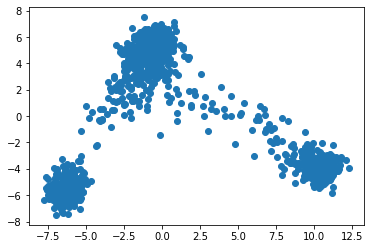

In [37]:
plt.scatter(x=pca_plot[:, 0], y=pca_plot[:, 1]) #shows there are three clusters

## Using Altair to plot PCA

In [38]:
import altair as alt

In [39]:
plot_df = df[non_snps].copy() #make a copy of the df to make a smaller df
plot_df

,Population code,Samples
0,GBR,HG00096
1,GBR,HG00097
2,GBR,HG00099
3,GBR,HG00100
4,GBR,HG00101
...,...,...
1087,TSI,NA20816
1088,TSI,NA20818
1089,TSI,NA20819
1090,TSI,NA20826


In [40]:
plot_df['PC1'] = pca_plot[:, 0] #add PC1 and PC2 to the df
plot_df['PC2'] = pca_plot[:, 1]
plot_df

,Population code,Samples,PC1,PC2
0,GBR,HG00096,0.312827,5.354349
1,GBR,HG00097,-0.679403,6.183329
2,GBR,HG00099,-0.420710,5.266720
3,GBR,HG00100,-0.805419,5.965095
4,GBR,HG00101,-0.771385,4.332076
...,...,...,...,...
1087,TSI,NA20816,0.647431,5.090230
1088,TSI,NA20818,-1.226520,6.273755
1089,TSI,NA20819,0.200440,4.437550
1090,TSI,NA20826,0.119733,4.959937


In [41]:
#plot PCA scatterplot using Altair
alt.Chart(plot_df).mark_point().encode(
    x="PC1",
    y="PC2",
    color=alt.Color("Population code", scale=alt.Scale(scheme="category20")) #set the points to colour by population code
)

alt.Chart(...)

In [42]:
#Upload the population data from IGSR
pop_data = pd.read_csv("igsr_populations.tsv", sep="\t")
pop_data


,Population code,Population elastic ID,Population name,Population description,Population latitude,Population longitude,Superpopulation code,Superpopulation name,Superpopulation display colour,Superpopulation display order,Number of samples,Data collections
0,CHS,CHS,Southern Han Chinese,Han Chinese South,23.133330,113.266667,EAS,East Asian Ancestry,#778500,3,171,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1,FIN,FIN,Finnish,Finnish in Finland,60.170000,24.930000,EUR,European Ancestry,#018ead,4,105,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
2,KHV,KHV,Kinh Vietnamese,"Kinh in Ho Chi Minh City, Vietnam",10.780000,106.680000,EAS,East Asian Ancestry,#778500,3,124,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
3,ACB,ACB,African Caribbean,African Caribbean in Barbados,13.100000,-59.620000,AFR,African Ancestry,#ffd845,1,123,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
4,NaN,OroqenHGDP,Oroqen,Oroqen in China (HGDP),50.400000,126.500000,NaN,East Asia (HGDP),#b35200,9,7,Human Genome Diversity Project
...,...,...,...,...,...,...,...,...,...,...,...,...
207,NaN,EstonianSGDP,Estonian,Estonian in Estonia (SGDP),58.500000,24.900000,NaN,West Eurasia (SGDP),#001f54,19,2,Simons Genome Diversity Project
208,NaN,SardinianSGDP,Sardinian,Sardinian in Italy (SGDP),40.000000,9.000000,NaN,West Eurasia (SGDP),#001f54,19,3,Simons Genome Diversity Project
209,NaN,DinkaSGDP,Dinka,Dinka in Sudan (SGDP),8.794444,27.400000,NaN,Africa (SGDP),#12eeff,13,3,Simons Genome Diversity Project
210,NaN,NaxiSGDP,Naxi,Naxi in China (SGDP),26.000000,100.000000,NaN,East Asia (SGDP),#ff48de,16,3,Simons Genome Diversity Project


In [43]:
#Merge the pop_data with the plot_df using "Population code" as reference
plot_df = plot_df.merge(pop_data, on="Population code", how="inner")
plot_df

,Population code,Samples,PC1,PC2,Population elastic ID,Population name,Population description,Population latitude,Population longitude,Superpopulation code,Superpopulation name,Superpopulation display colour,Superpopulation display order,Number of samples,Data collections
0,GBR,HG00096,0.312827,5.354349,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,107,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1,GBR,HG00097,-0.679403,6.183329,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,107,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
2,GBR,HG00099,-0.420710,5.266720,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,107,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
3,GBR,HG00100,-0.805419,5.965095,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,107,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
4,GBR,HG00101,-0.771385,4.332076,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,107,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,TSI,NA20816,0.647431,5.090230,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,112,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1088,TSI,NA20818,-1.226520,6.273755,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,112,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1089,TSI,NA20819,0.200440,4.437550,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,112,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1090,TSI,NA20826,0.119733,4.959937,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,112,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."


In [46]:
#Produce PCA plot based on Superpopulation name_x
alt.Chart(plot_df).mark_point().encode(
    x="PC1",
    y="PC2",
    color=alt.Color("Superpopulation name", scale=alt.Scale(scheme="category20")), #plot based on superpopulation
    fill='Population code' #set the inside of points to colour by population code
)


alt.Chart(...)

#Running tSNE

In [55]:
#import tSNE
from sklearn.manifold import TSNE

In [48]:
X = matrix
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random').fit_transform(X)
X_embedded.shape

(1092, 2)

In [54]:
#adding tSNE values to the end of the plot_df
plot_df['component1'] = X_embedded[:,0]
plot_df['component2'] = X_embedded[:,1]

In [53]:
#plotting tSNE plots
alt.Chart(plot_df).mark_point().encode(
    x='component1',
    y='component2',
    color=alt.Color('Superpopulation name', scale=alt.Scale(scheme='category20'))
)

alt.Chart(...)